## 1. From a webcam feed, the software will identify the lane marking and recommend the steering to keep the car in lane

[Reference-1](https://towardsdatascience.com/finding-lane-lines-simple-pipeline-for-lane-detection-d02b62e7572b)

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('data/road1.jpeg')
cv2.imshow("Image", image)
cv2.waitKey(0)

-1

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Image", gray)
cv2.waitKey(0)

-1

In [ ]:
left_bottom = [cols * 0.1, rows]
right_bottom = [cols * 0.95, rows]
left_top = [cols * 0.4, rows * 0.6]
right_top = [cols * 0.6, rows * 0.6]

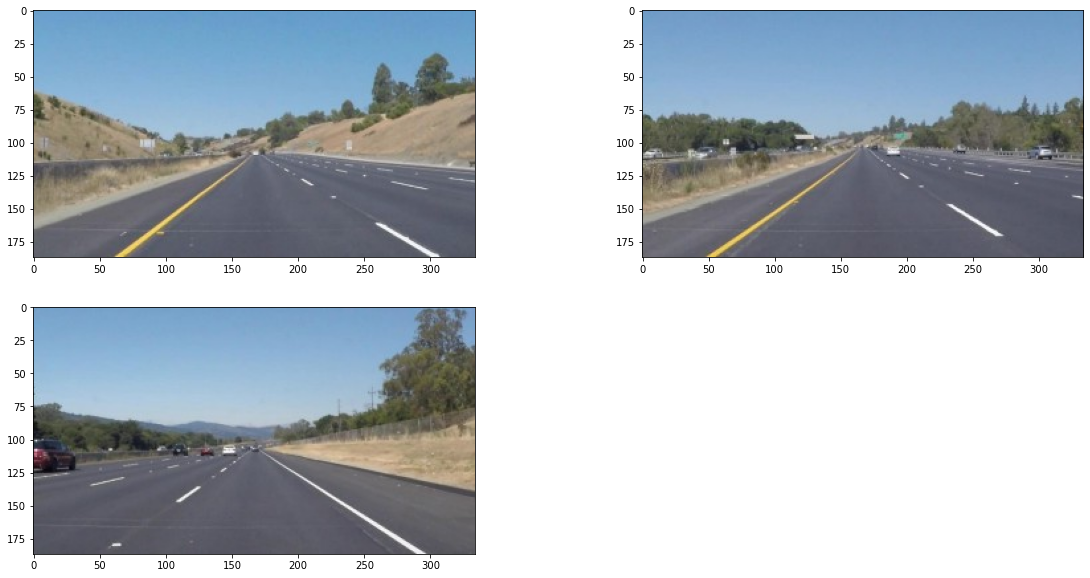

In [28]:
axes = []
fig = plt.figure(figsize=(20,10))

for i in range(3):
    axes.append(fig.add_subplot(2, 2, i+1))
    image = cv2.imread('data/road' + str(i+1) + '.jpeg')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # For Opencv BGR to matplotlib RGB
    plt.imshow(image)
plt.show()

In [4]:
hls_image = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
cv2.imshow("Image", hls_image)
cv2.waitKey(0)

-1

In [5]:
def isolate_color_mask(img, low_thresh, high_thresh):
    assert(low_thresh.all() >=0  and low_thresh.all() <=255)
    assert(high_thresh.all() >=0 and high_thresh.all() <=255)
    return cv2.inRange(img, low_thresh, high_thresh)

In [6]:
# Color Selection
white_mask = isolate_color_mask(hls_image, np.array([0, 200, 0], dtype=np.uint8), np.array([200, 255, 255], dtype=np.uint8))
yellow_mask = isolate_color_mask(hls_image, np.array([10, 0, 100], dtype=np.uint8), np.array([40, 255, 255], dtype=np.uint8))
mask = cv2.bitwise_or(white_mask, yellow_mask)
colored_img = cv2.bitwise_and(gray, gray, mask=mask)
cv2.imshow("Image", colored_img)
cv2.waitKey(0)

-1

In [7]:
blurred_image = cv2.GaussianBlur(colored_img, (7,7), 1)
cv2.imshow("Image", blurred_image)
cv2.waitKey(0)

-1

In [18]:
canny_image = cv2.Canny(blurred_image, 1,500)
cv2.imshow("Image", canny_image)
cv2.waitKey(0)

-1

In [56]:
rho=1
theta=np.pi/180
threshold=20
min_line_len=20
max_line_gap=300

lines = cv2.HoughLinesP(canny_image, rho, theta, threshold, np.array([]), 
                            minLineLength=min_line_len, maxLineGap=max_line_gap)
def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)
    return img

labelled_image = draw_lines(image, lines)
cv2.imshow("Image", labelled_image)
cv2.waitKey(0)

113

In [24]:
rows, cols

(187, 334)

In [28]:
rows, cols = image.shape[:2]
left_bottom = [cols * 1, rows]
right_bottom = [cols * 0.95, rows]
left_top = [cols * 1, rows * 0.6]
right_top = [cols * 0.6, rows * 0.6]

left_bottom, right_bottom, left_top, right_top

([334, 187], [317.3, 187], [334, 112.2], [200.4, 112.2])

In [19]:
left_bottom, right_bottom, left_top, left_bottom

([33.4, 187], [317.3, 187], [133.6, 112.2], [33.4, 187])